# **Recurrent Neural Network (RNN): Classifying Names with a Character-Level RNN**

+ **Character-Level RNN**: Analyzes names one character at a time to identify language or category.

+ **Fine-Grained Patterns**: Captures intricate patterns by examining character sequences and learning to classify names into predefined categories (e.g., "English", "Portuguese", "Finnish").

### **Importing Libraries**

In [12]:
import torch
import torch.nn as nn
import random
import string
import matplotlib.pyplot as plt
import glob
import os
import unicodedata
import time
import math

### **Creating the Dataset**

In [2]:
data = {
    'English': ['Jöhn', 'Ròbert', 'Michäel', 'Wïlliam', 'Davíd', 'Rïchard', 'Jöseph', 'Chärles', 'Thomås', 'Jämes'],
    'Spanish': ['Jósé', 'Cárlos', 'Luís', 'Francíscó', 'Jävier', 'Migüel', 'António', 'Manuël', 'Francïsça', 'Mária'],
    'French': ['Jeàn', 'Pièrre', 'Jäcques', 'Mïchel', 'Claûde', 'Loùis', 'Hènri', 'Pàul', 'Ròbert', 'Dâniel'],
    'German': ['Häns', 'Frîedrïch', 'Wïlhelm', 'Kärl', 'Jòhann', 'Jákob', 'Lùdwîg', 'Hermänn', 'Òtto', 'Álfred'],
    'Italian': ['Gïuseppe', 'Giôvanni', 'Antônio', 'Giûlia', 'Francesçä', 'Alëssandro', 'Mâtteo', 'Màrco', 'Päolo', 'Lücïa'],
    'Russian': ['Ívan', 'Alëxeï', 'Dmîtri', 'Sergeï', 'Vládi̥mir', 'Anastäsia', 'Nátàlia', 'Ôlga', 'Ïrina', 'Svetlänä'],
    'Chinese': ['Wèi', 'Xiäo', 'Lî', 'Wâng', 'Chèn', 'Yäng', 'Zhâng', 'Lïu', 'Huáng', 'Zhào'],
    'Japanese': ['Yüki', 'Hiröshi', 'Kënji', 'Miyüki', 'Sakürä', 'Tärô', 'Yôko', 'Käzuki', 'Näoko', 'Hïkaru'],
    'Korean': ['Jïn', 'Häe', 'Mïn', 'Sôo', 'Jüng', 'Yôon', 'Häna', 'Seôk', 'Kyunğ', 'Ëun'],
    'Arabic': ['Âhmed', 'Fätïma', 'Möhammed', 'Äisha', 'Ömar', 'Zäïnáb', 'Alî', 'Hässän', 'Hüssein', 'Sälmä'],
    'Turkish': ['Ähmet', 'Mehmet', 'Âyşe', 'Fatmä', 'Müstafä', 'Ëmine', 'Âlî', 'Hüseyin', 'Hätice', 'Bûrcü'],
    'Portuguese': ['Migüel', 'Âna', 'Joãö', 'Märîa', 'Pëdro', 'Cârlos', 'Lücia', 'Luîs', 'Fërnända', 'Ricárdo'],
    'Dutch': ['Jân', 'Piéter', 'Ânna', 'Klääs', 'Marîa', 'Hëndrik', 'Èls', 'Johân', 'Söfïe', 'Gërri̥t'],
    'Swedish': ['Êrik', 'Ânna', 'Lårs', 'Mariâ', 'Karîn', 'Ôlof', 'Ëva', 'Për', 'Ingrîd', 'Jôhan'],
    'Danish': ['Hâns', 'Kîrsten', 'Lárs', 'Ânna', 'Mörtën', 'Sôfîe', 'Jëns', 'Îda', 'Mïkkel', 'Hëlle'],
    'Norwegian': ['Ôle', 'Ïngrid', 'Bjørn', 'Sÿnnøve', 'Èrik', 'Sölveig', 'Kjetîl', 'Hïlde', 'Tôre', 'Lîv'],
    'Finnish': ['Mïkko', 'Kätri', 'Pëkka', 'Ëlina', 'Jãri', 'Hëli', 'Mätti', 'Lèena', 'Kàlle', 'Päula'],
    'Polish': ['Jàkub', 'Àgnie̥szka', 'Päwel', 'Mârtâ', 'Jän', 'Ânna', 'Krÿsztof', 'Ëwa', 'Märîusz', 'Beàta'],
    'Czech': ['Jàn', 'Ëva', 'Pêtr', 'Marïe', 'Jïří', 'Lucïe', 'Martîn', 'Katerïna', 'Tômaš', 'Pâvla'],
    'Hungarian': ['Lászlô', 'Kâtḁlin', 'Jánôs', 'Ërzsébet', 'Gâbor', 'Ânna', 'Mïklôs', 'Zsûzsanna', 'Ïstvân', 'Máriä'],
    'Romanian': ['Ïon', 'Marîa', 'Geörge', 'Ëlëna', 'Mïhai', 'Ioàna', 'Stëfan', 'Adrïâna', 'Vlâd', 'Mônica'],
    'Greek': ['Níkos', 'Marîa', 'Geôrgë', 'Käte̥rina', 'Yïánnïs', 'Êleni', 'Dimitris', 'Ânna', 'Ândreas', 'Vâsiliki'],
    'Hebrew': ['Dâvid', 'Miriäm', 'Yôsëf', 'Räçhël', 'Isàac', 'Särah', 'Ábraham', 'Lëah', 'Jäcob', 'Ësther'],
    'Thai': ['Sômchai', 'Südä', 'Anándä', 'Mänêe', 'Näi', 'Präpa', 'Sômchai', 'Nông', 'Chäi', 'Jït'],
    'Vietnamese': ['Ngüyën', 'Thï', 'Mïnh', 'Län', 'Ánh', 'Bînh', 'Thâo', 'Hânh', 'Tûan', 'Dûng'],
    'Hindi': ['Räj', 'Pôoja', 'Âmit', 'Sünïta', 'Râvi', 'Anjäli', 'Râkesh', 'Prïya', 'Vïjay', 'Nêha'],
    'Punjabi': ['Härpreet', 'Jaspréet', 'Bäljit', 'Amrît', 'Gürpreet', 'Sïmran', 'Räjinder', 'Pärmïnder', 'Mänpreet', 'Kîran'],
    'Bengali': ['Âmit', 'Prïya', 'Sänjay', 'Ânjali', 'Räjesh', 'Rïna', 'Subràta', 'Käjal', 'Râvi', 'Mïtâ'],
    'Malay': ['Âhmad', 'Sïtï', 'Mohd', 'Nür', 'Âli', 'Âisyah', 'Jämil', 'Fätïmah', 'Räni', 'Shäh'],
    'Swahili': ['Jüma', 'Âmanï', 'Nïa', 'Zürï', 'Jäbärï', 'Âsha', 'Kwame', 'Nïä', 'Hakïm', 'Mwanä'],
    'Xhosa': ['Thäbo', 'Zöla', 'Lïndiwe', 'Sïpho', 'Nölwazi', 'Mkhïze', 'Nändï', 'Bôngani', 'Sänële', 'Thêmbi'],
    'Zulu': ['Môsës', 'Zänele', 'Thûlanï', 'Nömsa', 'Lindï', 'Sïphïwe', 'Bongânï', 'Dïneo', 'Khanÿi', 'Jäbulanï'],
    'Afrikaans': ['Pïëter', 'Ânna', 'Jân', 'Märïa', 'Hërman', 'Pëtra', 'Hëndrîk', 'Ëlïze', 'Köbus', 'Êlsie'],
    'Armenian': ['Ära', 'Lüsïnë', 'Vardân', 'Ânahit', 'Gëvörg', 'Ârpîne', 'Tïgran', 'Häsmik', 'Näre̥k', 'Mariäm'],
    'Georgian': ['Giôrgi', 'Nïno', 'Mïkheïl', 'Tamär', 'Lëvan', 'Këtëvan', 'Väkhẗang', 'Tinätin', 'Zûra', 'Nâtiä']
}

### **directory for synthetic data**

In [3]:
data_dir = 'data/names'
os.makedirs(data_dir, exist_ok=True)

for language, names in data.items():
    with open(os.path.join(data_dir, f'{language}.txt'), 'w', encoding='utf-8') as file:
        for name in names:
            file.write(name + '\n')

print("Synthetic dataset created.")

Synthetic dataset created.


### **Preparing the Dataset**

In [4]:
all_letters = string.ascii_letters
n_letters = len(all_letters)
print(n_letters)

52


In [5]:
# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) 
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [6]:
# below function read the names from a file, convert them to ASCII, and return them as a list.
def readLines(filename):
    with open(filename, encoding='utf-8') as file:
        lines = file.read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [7]:
# to create dictionary to map each language (category) to a list of names
def createCategoryLines():
    language_lines, all_languages= {}, []
    for filename in glob.glob(os.path.join(data_dir, '*.txt')):
        language = os.path.splitext(os.path.basename(filename))[0]
        all_languages.append(language)
        lines = readLines(filename)
        language_lines[language] = lines
    return language_lines, all_languages

In [8]:
language_lines, all_languages = createCategoryLines()
n_categories = len(all_languages)

In [9]:
language_lines 

{'Afrikaans': ['Pieter',
  'Anna',
  'Jan',
  'Maria',
  'Herman',
  'Petra',
  'Hendrik',
  'Elize',
  'Kobus',
  'Elsie'],
 'Arabic': ['Ahmed',
  'Fatima',
  'Mohammed',
  'Aisha',
  'Omar',
  'Zainab',
  'Ali',
  'Hassan',
  'Hussein',
  'Salma'],
 'Armenian': ['Ara',
  'Lusine',
  'Vardan',
  'Anahit',
  'Gevorg',
  'Arpine',
  'Tigran',
  'Hasmik',
  'Narek',
  'Mariam'],
 'Bengali': ['Amit',
  'Priya',
  'Sanjay',
  'Anjali',
  'Rajesh',
  'Rina',
  'Subrata',
  'Kajal',
  'Ravi',
  'Mita'],
 'Chinese': ['Wei',
  'Xiao',
  'Li',
  'Wang',
  'Chen',
  'Yang',
  'Zhang',
  'Liu',
  'Huang',
  'Zhao'],
 'Czech': ['Jan',
  'Eva',
  'Petr',
  'Marie',
  'Jiri',
  'Lucie',
  'Martin',
  'Katerina',
  'Tomas',
  'Pavla'],
 'Danish': ['Hans',
  'Kirsten',
  'Lars',
  'Anna',
  'Morten',
  'Sofie',
  'Jens',
  'Ida',
  'Mikkel',
  'Helle'],
 'Dutch': ['Jan',
  'Pieter',
  'Anna',
  'Klaas',
  'Maria',
  'Hendrik',
  'Els',
  'Johan',
  'Sofie',
  'Gerrit'],
 'English': ['John',
  'Robert'

In [10]:
all_languages

['Afrikaans',
 'Arabic',
 'Armenian',
 'Bengali',
 'Chinese',
 'Czech',
 'Danish',
 'Dutch',
 'English',
 'Finnish',
 'French',
 'Georgian',
 'German',
 'Greek',
 'Hebrew',
 'Hindi',
 'Hungarian',
 'Italian',
 'Japanese',
 'Korean',
 'Malay',
 'Norwegian',
 'Polish',
 'Portuguese',
 'Punjabi',
 'Romanian',
 'Russian',
 'Spanish',
 'Swahili',
 'Swedish',
 'Thai',
 'Turkish',
 'Vietnamese',
 'Xhosa',
 'Zulu']

### **Building the model**

In [11]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

Example: If the input is a tensor representing the letter "J", the model will output the probabilities of each language (e.g., 0.7 for "English").

### ****Turning Names into Tensors****

In [13]:
# Converts a letter to its index in `all_letters`.
def letterToIndex(letter):
    return all_letters.find(letter)

letterToIndex('b')

1

In [14]:
# Converts a letter to a one-hot encoded tensor.
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

letterToTensor('b')

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# Converts a line (name) to a tensor of one-hot encoded letters.
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

lineToTensor('Bob')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.]]])

In [16]:
def randomChoice(all_languages):
    return all_languages[random.randint(0, len(all_languages) - 1)]

# Randomly selects a language and a corresponding name, and prepares their tensors.
def randomTrainingExample():
    category = randomChoice(all_languages)
    line = randomChoice(language_lines[category])
    category_tensor = torch.tensor([all_languages.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

### **Time Calculation**

In [17]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [18]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
criterion = nn.NLLLoss()
learning_rate = 0.005

### **Training Function**

In [19]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()


### **Evaluation and Extractor Category from Output Functions**

In [20]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_languages[category_i], category_i

### **Accuracy Calculation**

In [21]:
def calculate_accuracy():
    correct = 0
    total = 0
    for category in all_languages:
        for name in language_lines[category]:
            category_tensor = torch.tensor([all_languages.index(category)], dtype=torch.long)
            line_tensor = lineToTensor(name)
            output = evaluate(line_tensor)
            _, predicted = torch.max(output, 1)
            if predicted.item() == all_languages.index(category):
                correct += 1
            total += 1
    return correct / total

### **Training**

5000 10% (0m 19s) 3.1438 Liv / Norwegian ✓
10000 20% (0m 36s) 2.9509 Marta / Portuguese ✗ (Polish)
15000 30% (0m 54s) 1.0446 Juma / Swahili ✓
20000 40% (1m 12s) 0.0878 Somchai / Thai ✓
25000 50% (1m 30s) 0.0153 Erzsebet / Hungarian ✓
30000 60% (1m 45s) 0.4106 Wei / Chinese ✓
35000 70% (2m 0s) 0.0005 Krysztof / Polish ✓
40000 80% (2m 15s) 0.5017 Jamil / Malay ✓
45000 90% (2m 31s) 0.3574 Priya / Hindi ✓
50000 100% (2m 48s) 0.0650 Paula / Finnish ✓


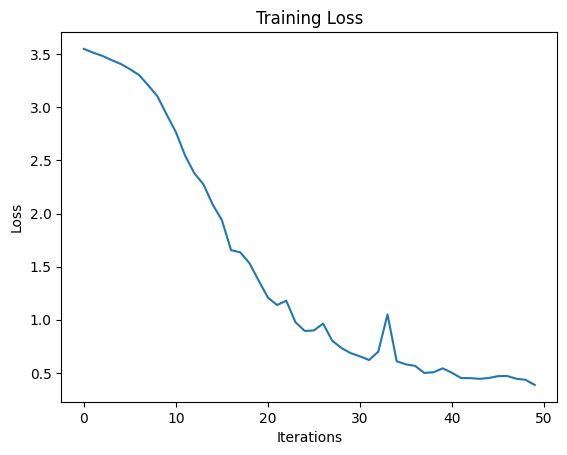

In [22]:
def train_model(n_iters=50000, print_every=5000, plot_every=1000):
    current_loss = 0
    all_losses = []
    start = time.time()

    for iter in range(1, n_iters + 1):
        category, line, category_tensor, line_tensor = randomTrainingExample()
        output, loss = train(category_tensor, line_tensor)
        current_loss += loss

        if iter % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0

    plt.figure()
    plt.plot(all_losses)
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

train_model()


In [23]:
print('Validation Accuracy: {:.2f}%'.format(calculate_accuracy() * 100))

Validation Accuracy: 85.14%
